In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats


import pandas as pd
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [44]:
#loading the data
data = pd.read_csv("Clean_data")

In [45]:
data = data[["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea","SalePrice"]]



In [46]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, 
    data['SalePrice'],  
    test_size=0.3,  
    random_state=0)

In [47]:
X_train.shape

(1022, 5)

In [48]:
def diagnostic(df, var):
    
    """
    This function returns 3 plots
    1) Box Plot
    2) Q-Q Plot
    3) Histogram
    """
    plt.figure(figsize=(20,4))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(df[var])
    plt.title("Box plot-"+ var)
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[var], dist ="norm", plot=plt)
    plt.title("Q-Q-"+ var)
    
    
    plt.subplot(1, 3, 3)
    plt.hist(df[var],bins=30)
    plt.title("Histogram-" + var)

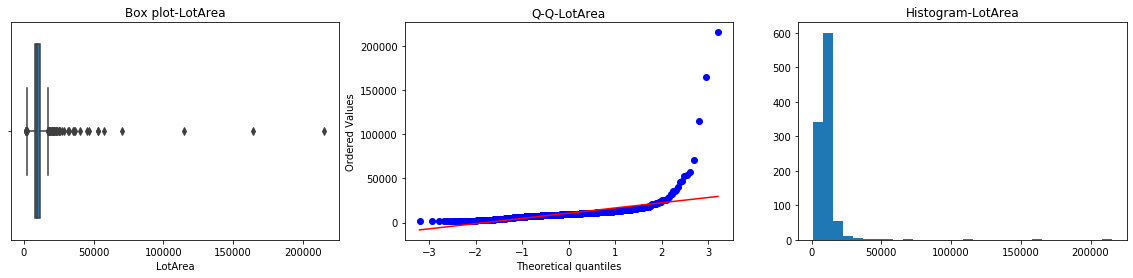

In [49]:
diagnostic(X_train,"LotArea")

# Capping based on skewed distribution

In [50]:
#function that returns upper limit and lower limit
def lower_upper(data, var):
    
    IQR = data[var].quantile(0.75) - data[var].quantile(0.25)

    lower = data[var].quantile(0.25) - (IQR * 1.5)
    upper = data[var].quantile(0.75) + (IQR * 1.5)
    
    X_train[var+"_transformed"] = np.where(X_train[var]<lower,lower,
                           np.where(X_train[var]>upper,upper,X_train[var]))

In [51]:
lower_upper(X_train,"LotArea")

In [52]:
X_train.head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice,LotArea_transformed
64,60.0,9375,1057,2034,219500,9375.0
682,60.0,2887,1291,1291,173000,2887.0
960,50.0,7207,858,858,116500,7207.0
1384,60.0,9060,698,1258,105000,9060.0
1100,60.0,8400,438,438,60000,8400.0


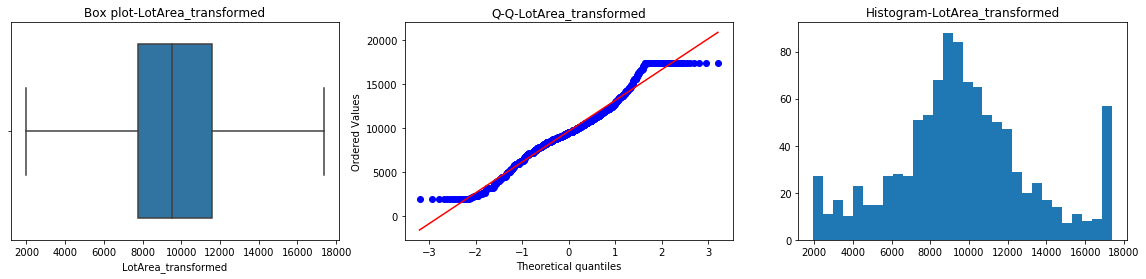

In [53]:
diagnostic(X_train,"LotArea_transformed")

# Capping bases on normal distribution


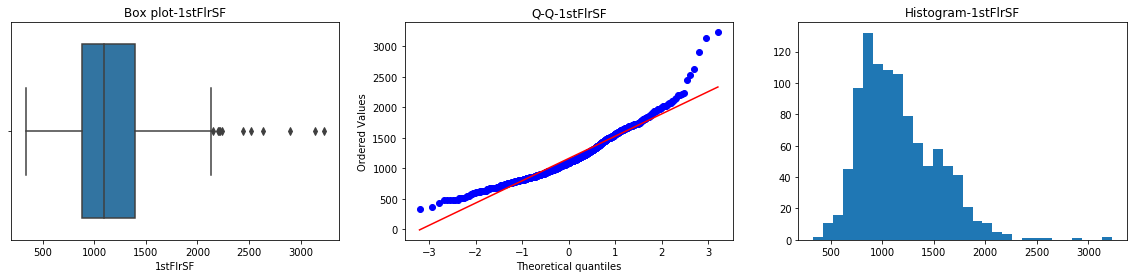

In [54]:
diagnostic(X_train,"1stFlrSF")

In [55]:
#function that returns upper limit and lower limit
def lower_upper(data, var):
    
    
    upper = data[var].mean() + 3 * data[var].std()
    lower = data[var].mean() - 3 * data[var].std()
    
    X_train[var+"_transformed"] = np.where(X_train[var]<lower,lower,
                           np.where(X_train[var]>upper,upper,X_train[var]))

In [56]:
lower_upper(X_train,"1stFlrSF")

In [57]:
X_train.head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice,LotArea_transformed,1stFlrSF_transformed
64,60.0,9375,1057,2034,219500,9375.0,1057.0
682,60.0,2887,1291,1291,173000,2887.0,1291.0
960,50.0,7207,858,858,116500,7207.0,858.0
1384,60.0,9060,698,1258,105000,9060.0,698.0
1100,60.0,8400,438,438,60000,8400.0,438.0


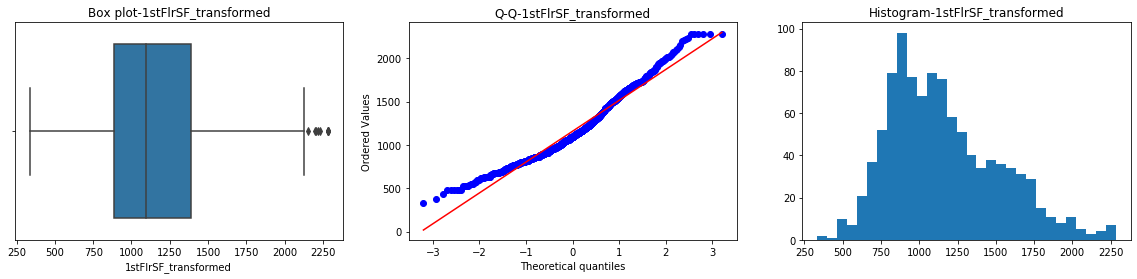

In [58]:
diagnostic(X_train,"1stFlrSF_transformed")